<style>
/***** Global layout + Header/Footer (enhanced clearance) *****/
:root { --header-height: 72px; --header-bg:#ffffff; --footer-height:30px; }
:root { --header-gap: 20px; } /* Extra gap so no heading crowds header */
body { margin:0; padding-top: calc(var(--header-height) + var(--header-gap)); margin-bottom: var(--footer-height); }
.jp-Notebook, .notebook-app, .lab-app { padding-top: calc(var(--header-height) + var(--header-gap)); }
.print-header { position: fixed; top:0; left:0; right:0; height: var(--header-height); display:flex; align-items:center; justify-content:space-between; padding:10px 18px 8px 16px; box-sizing:border-box; background:var(--header-bg); font-size:0.85em; z-index:999; }
.print-header .logo-wrap { display:flex; align-items:center; gap:12px; }
.print-header img.logo { height:34px; width:auto; object-fit:contain; display:block; }
.print-header .report-title { font-weight:600; letter-spacing:0.4px; font-size:1.0em; line-height:1.15; }
.print-footer { position: fixed; left:0; right:0; bottom:0; height: var(--footer-height); display:flex; align-items:center; justify-content:center; font-size:0.7em; color:#444; background:#fff; z-index:998; }
.first-page .print-header, .first-page .print-footer { display:none; }
@media print {
  body { margin:0; padding-top: calc(var(--header-height) + var(--header-gap)); margin-bottom: var(--footer-height); }
  .jp-Notebook, .notebook-app, .lab-app { padding-top: calc(var(--header-height) + var(--header-gap)); }
  .print-header, .print-footer { position: fixed; }
  .first-page .print-header, .first-page .print-footer { display:none !important; }
  .print-footer:after { content: "Page " counter(page) " of " counter(pages); }
}

/***** Headings visibility & protection *****/
h1, h2, h3, h4 { position:relative; z-index:1; margin-top:0.2em; }
@media print { h1, h2, h3, h4 { page-break-after: avoid; break-after: avoid; } }
/* Keep heading with first block (paragraph/table/figure) */
.keep-with-next, h1 + p, h2 + p, h3 + p, h4 + p, h2 + .keep-together, h3 + .keep-together { page-break-after: avoid; }
.nobreak, .keep-together { break-inside: avoid; page-break-inside: avoid; }

/***** Page break helper (manual control) *****/
@media print { .pagebreak { page-break-before: always; break-before: page; } }
.pagebreak { margin:0; border:0; height:0; }

/***** Output spacing after breaks *****/
@media print {
  .pagebreak + h1, .pagebreak + h2, .pagebreak + h3, .pagebreak + h4 { margin-top:0; }
  .pagebreak + .jp-CodeCell, .pagebreak + .jp-Cell, .pagebreak + .output_wrapper { margin-top:0.25em; }
}

/***** Captions & notes *****/
.caption { font-weight:600; font-size:0.85em; }
.figure-note { font-size:0.85em; }
.small { font-size:0.85em; }

/***** Hide ONLY code inputs (not headings) in print *****/
@media print {
  .jp-CodeCell .jp-Cell-inputWrapper,
  .cell.code_cell .input,
  .jp-InputPrompt, .prompt { display:none !important; }
  figure, table, img, .figure-block, .table-block, .caption, .figure-note { break-inside: avoid; page-break-inside: avoid; }
  img { max-width:100% !important; height:auto !important; }
}
</style>

In [71]:
# Hide warnings globally (keep output clean)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


# Laboration – Frekvensanalys

Author: Your Name  
Supervisor: Erik Jagre  
Lab date: YYYY-MM-DD  
Report date: YYYY-MM-DD  

<div class="pagebreak"></div>

## Abstract

This lab investigated Fourier analysis of periodic waveforms and the effect of a first-order RC low-pass filter. Sawtooth, triangle, and sine signals were generated, analyzed with the oscilloscope FFT, and compared against theoretical Fourier coefficients. The measurements confirmed the expected harmonic patterns: \(1/n\) decay for sawtooth, \(1/n^2\) decay for triangle, and only the fundamental for sine. The RC filter introduced the predicted ≈ −20 dB/decade attenuation, reducing higher harmonics and producing smoother time-domain signals.  

Minor deviations of a few dB were attributed to FFT windowing, limited frequency resolution, generator characteristics, and component tolerances. The combined use of oscilloscope FFT and Python post-processing proved effective for quantitative harmonic extraction and for validating theoretical predictions under real measurement conditions.  

<div class="pagebreak"></div>


## Table of Contents

This report is structured as follows (page numbers refer to the exported PDF):

1. Introduction  
2. Theory  
3. Experiment  
4. Results  
   4.1 Sawtooth  
   4.2 Triangle  
   4.3 Sine  
   4.4 RC filter  
5. Discussion  
6. Conclusions  
7. References  
8. Appendix A — Figures  
9. Appendix B — Code  

**Numbering note:** Figures are numbered sequentially in the main text (Fig. 1–10).  
Tables are numbered in order of appearance:  
- Table 1 — Method validation  
- Table 2a–2b — Sawtooth results  
- Table 3a–3b — Triangle results  
- Table 4a–4b — Sine results  
- Table 5 — RC filter results  

<div class="pagebreak"></div>


## Introduction

The Fourier series is a fundamental tool in electronics, allowing periodic signals to be represented as sums of sinusoids. This makes it possible to analyze signal behavior in the frequency domain, where effects such as bandwidth limitations, distortion, and noise become clearer.  

Fourier analysis is central to many practical systems, including filters and communication links, where accurate frequency-domain models are necessary to predict performance.  

The purpose of this lab is to compare theoretical Fourier spectra of basic waveforms with experimental measurements and to investigate how a first-order RC low-pass filter shapes the harmonic content of signals.  


<div class="pagebreak"></div>

## Theory

The Fourier series coefficients used later in the results are listed below. Each equation includes a short label and one-sentence interpretation.

- Eq. (1): Sawtooth harmonics (all harmonics)

  $$A_n = \dfrac{2A}{\pi n},\; n\ge 1$$

  Sawtooth contains all harmonics with amplitudes decreasing approximately as 1/n.

- Eq. (2): Triangle harmonics (odd only)

  $$A_n = \dfrac{8A}{\pi^2 n^2},\; n=1,3,5,\dots$$

  Triangle contains only odd harmonics with amplitudes decreasing approximately as 1/n^2.

- Eq. (3): Sine harmonic content

  $$A_1 = A,\; A_{n>1}=0$$

  An ideal sine contains only the fundamental.

- Eq. (4): RMS and dBV conversion

  $$V_{\mathrm{rms}} = \dfrac{V_{\mathrm{peak}}}{\sqrt{2}},\qquad \mathrm{dBV} = 20\log_{10}\!\left(\dfrac{V_{\mathrm{rms}}}{1\,\mathrm{V}}\right)$$

  These relations convert peak values to RMS and express amplitudes on a dBVrms scale.

- Eq. (5): RC low-pass transfer function and cutoff

  $$|H(f)| = \dfrac{1}{\sqrt{1 + (f/f_c)^2}},\qquad \angle H(f) = -\arctan(f/f_c),\qquad f_c = \dfrac{1}{2\pi RC}$$

  The RC filter attenuates higher frequencies; above the cutoff, magnitude falls with roughly −20 dB/decade.

<div class="keep-with-next nobreak">Sources for formulas and lab guidance: [1]–[3].</div>
<div class="pagebreak"></div>

In [72]:
# === CORE MATH: Fourier + RC (single source of truth) ===
import numpy as np
import pandas as pd

# ----- Lab constants (edit once here) -----
F0 = 1000.0              # fundamental [Hz]
# Drive level: either set VPP directly OR infer it from a measured fundamental in dBVrms
VPP_SCOPE = 5.0          # Vpp seen on scope time trace (set to your actual)
A_PEAK    = VPP_SCOPE/2  # Vpeak used in Fourier formulas

# Measured RC (use measured everywhere for consistency)
R_MEAS = 8140.0          # Ohm
C_MEAS = 9.853e-9        # F
FC_MEAS = 1.0/(2*np.pi*R_MEAS*C_MEAS)

# ---------- Helpers ----------
def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20*np.log10(v)

def rc_mag(f, fc=FC_MEAS):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

# ---------- Fourier peak -> Vrms -> dBVrms ----------
def saw_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return 2.0*A/(np.pi*np.maximum(n, 1))                 # all n

def tri_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    out = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    out[odd] = 8.0*A/(np.pi**2 * np.maximum(n[odd], 1)**2) # odd only
    return out                                             # even -> 0

def sin_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return (n == 1).astype(float)*A                        # only n=1

def vpk_to_dBVrms(vpk):
    vrms = np.asarray(vpk, float)/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)

def saw_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(saw_vpk(n, A))
def tri_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(tri_vpk(n, A))
def sin_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(sin_vpk(n, A))

def fourier_dBVrms(waveform, n, A=A_PEAK):
    wf = waveform.lower()
    if wf == 'saw': return saw_dBVrms(n, A)
    if wf == 'tri': return tri_dBVrms(n, A)
    if wf == 'sin': return sin_dBVrms(n, A)
    raise ValueError("waveform must be 'saw'|'tri'|'sin'")

def fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0):
    # 20*log10( |Fourier| * |H| ) = dBV_fourier + 20*log10|H|
    return fourier_dBVrms(waveform, n, A) + vrms_to_dBVrms(rc_mag(np.asarray(n)*f0))

# ---------- Utility: harmonics picker from spectrum ----------
def pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=10, col='dBVrms'):
    f = spec_df['freq'].values
    y = spec_df[col].values
    n_all = np.arange(1, n_max+1); targets = n_all*f0
    ok = (targets >= f.min()) & (targets <= f.max())
    n = n_all[ok]; t = targets[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'freq_bin': f[choose], col: y[choose]})

# ---------- Optional: infer Vpp from a measured fundamental in dBVrms ----------
def infer_vpp_from_dBV_fund(dBV_fund):
    Vrms = 10**(dBV_fund/20.0)
    Vpk  = Vrms*np.sqrt(2.0)
    return 2.0*Vpk  # Vpp


## Experiment

### Equipment
- Keysight DSOX1204G oscilloscope (FFT function and built-in AWG)  
- RND Lab Function Generator, model RND 360-00002 (500 MSa/s, 14-bit resolution, 35 MHz bandwidth) [8][9]  
- Resistor: nominal 8.2 kΩ, measured 8.140 kΩ (Fluke 155)  
- Capacitor: nominal 10 nF, measured 9.853 nF (Agilent U1731C)  
- Multimeter: Fluke 155  
- LCR meter: Agilent U1731C  
- Software: Python (NumPy, Pandas, Matplotlib)

### Procedure
1. Configure the signal sources for 1 kHz, 5 Vpp. Select sawtooth, triangle, and sine waveforms.  
   - Signals were generated both with the Keysight oscilloscope’s built-in AWG and with the external RND Lab function generator for comparison.  
2. Record FFT spectra with approximately 20,000 points per trace to achieve fine frequency resolution.  
3. Export FFT data using Keysight BenchVue [7]. The oscilloscope FFT reports amplitudes in **Vrms** (with a Hann window applied by default [6]); these values were converted to **dBVrms** in Python for analysis and comparison.  
4. Extract harmonics \(n = 1 \dots 10\) at integer multiples of 1 kHz.  
5. Compare measured spectra against theoretical Fourier coefficients. For the RC case, apply the transfer function \(|H(f)|\).  
6. Capture time-domain screenshots of both input and RC-filtered signals for reference.  

*Note:* Results are presented in both **dBVrms** (absolute amplitude, referenced to 1 Vrms) and **dBc** (relative to the fundamental). Using dBc removes differences in absolute scaling between sources and highlights the expected harmonic decay patterns, making it easier to compare with Fourier theory.  

### Calculations and Validation

Before analyzing the measured spectra, two preliminary calculations were carried out to establish a baseline:

1. **RC cutoff frequency:**  
   Using the measured component values, the cutoff frequency was calculated as  

   $$
   f_c = \frac{1}{2\pi RC} \approx 1984~\text{Hz}, 
   \quad R = 8140~\Omega,\; C = 9.853~\text{nF}.
   $$

2. **Fourier coefficients:**  
   Harmonic amplitudes for sawtooth and triangle signals were computed both manually and with Python.  
   The two approaches gave identical results within rounding error, confirming the correctness of the implementation.  

Table 1 summarizes the Fourier coefficient validation and shows agreement between manual and Python calculations.  


In [73]:
# Compute cutoff using measured R and C values (for reference)
import numpy as np
R_meas = 8140.0        # ohms (Fluke 155)
C_meas = 9.853e-9      # farads (Agilent U1731C)
fc_meas = 1.0/(2*np.pi*R_meas*C_meas)
from IPython.display import display, HTML

# Display only a concise numeric result suitable for the report
display(HTML(f"<div><b>Calculated cutoff frequency (measured R,C)</b>: f<sub>c</sub> ≈ {fc_meas:.2f} Hz (R={R_meas:.0f} Ω, C={C_meas*1e9:.3f} nF)</div>"))

<!-- Moved to Appendix B: Manual calculations vs Python (cross-check) -->

In [74]:
# Read manual calculations CSV (Swedish locale) and compare with Python theory — uses TOP MATH CELL
import pandas as pd, numpy as np
from IPython.display import display, HTML

# ---- Input file ----
manual_csv = 'Handberäkningar Frekvensanalys - Blad3.csv'

# ---- Robust CSV read: handles decimal comma, stray spaces, unicode minus ----
raw = pd.read_csv(manual_csv, sep=',', header=0, dtype=str, engine='python')
raw = raw.applymap(lambda s: s.strip() if isinstance(s, str) else s)
raw = raw.replace({'−': '-'}, regex=True)               # normalize unicode minus
for col in raw.columns:                                 # decimal comma -> dot
    raw[col] = raw[col].str.replace(',', '.', regex=False)

# ---- Header mapping (tolerant to trailing spaces/variants) ----
cols_map = {
    'n (n kHz)': 'n',
    'Sågtandsvåg (dBVrms, teoretiska)': 'saw_dBV_manual',
    'Triangelvåg (dBVrms, teoretiska)': 'tri_dBV_manual',
    'Sågtandsvåg i RC-filter (Dämpning absolutbelopp)': 'rc_mag_manual',
    'Sågtandsvåg i RC-filter (dämpning i dB jämfört med magnitud, teoretiska)': 'rc_dB_manual',
}
rename = {}
for c in raw.columns:
    for k, v in cols_map.items():
        if c and c.strip().startswith(k.strip()):
            rename[c] = v
            break

need = list(cols_map.values())
manual = raw.rename(columns=rename)
missing = [c for c in need if c not in manual.columns]
if missing:
    raise ValueError(f"Missing expected columns in CSV: {missing}\nFound: {list(manual.columns)}")

manual = manual[need].copy()
for c in manual.columns:
    manual[c] = pd.to_numeric(manual[c], errors='coerce')
manual = manual.dropna(subset=['n']).astype({'n': int}).reset_index(drop=True)

# ---- Python theory using the SHARED MATH CELL (no redefinition here) ----
# Assumes the following are already defined in the top math cell:
#   F0, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms()
calc = manual[['n']].copy()

# Fourier series (dBVrms) with your shared fourier_dBVrms()
calc['saw_dBV_python'] = fourier_dBVrms('saw', calc['n'].values)
calc['tri_dBV_python'] = fourier_dBVrms('tri', calc['n'].values)

# RC magnitude using measured RC from the math cell (rc_mag) at n·F0
calc['rc_mag_python']  = rc_mag(calc['n'].values * F0)
calc['rc_dB_python']   = vrms_to_dBVrms(calc['rc_mag_python'].values)

# ---- Merge & deltas ----
cmp = manual.merge(calc, on='n', how='left')
cmp['Δ_saw_dB'] = cmp['saw_dBV_python'] - cmp['saw_dBV_manual']
cmp['Δ_tri_dB'] = cmp['tri_dBV_python'] - cmp['tri_dBV_manual']
cmp['Δ_rc_mag'] = cmp['rc_mag_python']  - cmp['rc_mag_manual']
cmp['Δ_rc_dB']  = cmp['rc_dB_python']   - cmp['rc_dB_manual']

# ---- Display (rounded to 2 decimals) ----
cols = [
    'n',
    'saw_dBV_manual','saw_dBV_python','Δ_saw_dB',
    'tri_dBV_manual','tri_dBV_python','Δ_tri_dB',
    'rc_mag_manual','rc_mag_python','Δ_rc_mag',
    'rc_dB_manual','rc_dB_python','Δ_rc_dB',
]
fmt = {
    'saw_dBV_manual': '{:.2f}', 'saw_dBV_python': '{:.2f}', 'Δ_saw_dB': '{:+.2f}',
    'tri_dBV_manual': '{:.2f}', 'tri_dBV_python': '{:.2f}', 'Δ_tri_dB': '{:+.2f}',
    'rc_mag_manual': '{:.2f}',  'rc_mag_python': '{:.2f}',  'Δ_rc_mag': '{:+.2f}',
    'rc_dB_manual': '{:.2f}',   'rc_dB_python': '{:.2f}',   'Δ_rc_dB': '{:+.2f}',
}

display(HTML("<div class='figure-note keep-with-next nobreak'>Table 1 shows good agreement between manual Fourier calculations and Python, confirming the method.</div>"))
display(HTML("<div style='font-weight:600' class='caption'>Table 1. Manual calculations vs Python theory (rounded to 2 decimals)</div>"))
try:
    display(cmp[cols].round(2))
except Exception:
    display(cmp[cols].style.format(fmt))
display(HTML("<div class='figure-note keep-with-next nobreak'>Agreement within rounding confirms correct implementation.</div>"))


,n,saw_dBV_manual,saw_dBV_python,Δ_saw_dB,tri_dBV_manual,tri_dBV_python,Δ_tri_dB,rc_mag_manual,rc_mag_python,Δ_rc_mag,rc_dB_manual,rc_dB_python,Δ_rc_dB
0,1,1.02,1.03,0.01,3.12,3.12,0.00,0.89,0.89,0.00,-1.01,-0.98,0.03
1,2,-4.95,-4.99,-0.05,0.00,-240.00,-240.00,0.70,0.70,0.00,-3.10,-3.04,0.06
2,3,-8.52,-8.52,0.01,-16.00,-15.96,0.04,0.54,0.55,0.01,-5.35,-5.17,0.18
3,4,-10.97,-11.02,-0.05,0.00,-240.00,-240.00,0.44,0.44,0.00,-7.13,-7.04,0.09
4,5,-12.91,-12.95,-0.05,-24.84,-24.83,0.01,0.36,0.37,0.01,-8.83,-8.66,0.17
5,6,-13.38,-14.54,-1.15,0.00,-240.00,-240.00,0.31,0.31,0.00,-10.17,-10.06,0.11
6,7,-15.78,-15.88,-0.10,-30.76,-30.68,0.08,0.27,0.27,0.00,-11.37,-11.29,0.08
7,8,-17.00,-17.04,-0.04,0.00,-240.00,-240.00,0.24,0.24,0.00,-12.40,-12.37,0.03
8,9,-18.00,-18.06,-0.06,-35.05,-35.05,0.01,0.21,0.22,0.01,-13.55,-13.34,0.21
9,10,-18.93,-18.97,-0.05,0.00,-240.00,-240.00,0.19,0.19,0.00,-14.42,-14.22,0.20


<div class="pagebreak"></div>

## Results  

The results are presented in four subsections. Each includes harmonic tables, plots, and a short interpretation linked to the theoretical formulas. Figures and tables are numbered in order of appearance.  

### 4.1 Sawtooth — Theory vs Keysight vs RND Lab  

The first ten harmonics (n = 1…10) of the sawtooth waveform were measured and compared with theory.  

- **Tables 2a–2b:** Absolute amplitudes (dBVrms) and normalized spectra (dBc).  
- **Fig. 1:** Overlay of theory, Keysight, and RND spectra.  
- **Interpretation:** All harmonics were present, decaying close to the theoretical \(1/n\) slope. The RND source preserved stronger upper harmonics, while Keysight showed earlier roll-off.  

### 4.2 Triangle — Theory vs Keysight vs RND Lab  

Theoretically, only odd harmonics appear, decaying as \(1/n^2\).  

- **Tables 3a–3b:** Odd harmonics in both absolute (dBVrms) and normalized (dBc) form.  
- **Fig. 2:** Overlay of theory, Keysight, and RND spectra.  
- **Interpretation:** Odd harmonics followed the predicted \(1/n^2\) slope. Even harmonics stayed near the noise floor, consistent with theory. RND followed the theoretical decay closely, while Keysight showed slightly stronger suppression of higher orders.  

### 4.3 Sine — Theory vs Keysight vs RND Lab  

For an ideal sine wave, only the fundamental should remain.  

- **Tables 4a–4b:** Fundamental amplitude compared with theory; higher orders remained near the noise floor.  
- **Fig. 3:** Overlay of spectra from both sources.  
- **Interpretation:** Both generators reproduced the fundamental accurately. Harmonics above n = 1 were below −50 dBc, attributed to FFT leakage and small non-idealities.  

### 4.4 RC Filter  

The RC low-pass filter results are gathered in this section.  

- **Tables 5a–5b:** Input vs output spectra for Keysight and RND, with theoretical attenuation for comparison.  
- **Figs. 4a–4b:** Four-trace overlays (absolute dBVrms and normalized dBc) showing Keysight and RND before/after RC, with theoretical markers.  
- **Figs. 5–7:** FFT spectra at 1 kHz, 10 kHz, and 100 kHz, confirming frequency-dependent roll-off.  
- **Figs. 8–10:** Time-domain views at the same frequencies, showing progressively smoother outputs as higher harmonics were suppressed.  
- **Interpretation:** The measured cutoff around 2 kHz agreed with the calculated value. Harmonic attenuation followed the expected −20 dB/decade trend, and time-domain waveforms confirmed the smoothing effect. Small deviations are explained by component tolerances, parasitic capacitances, FFT resolution, and the Hann window.  

*Note: Differences between Keysight AWG and RND Lab FG are already visible in Sections 4.1–4.3 and are therefore not repeated here.*  


In [75]:
# === ELA24: Comparisons in dBVrms (no files written) — uses TOP MATH CELL ===
# Uses the shared helpers defined earlier:
#   F0, A_PEAK, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms(),
#   fourier_times_rc_dBVrms(), pick_harmonics_from_spectrum()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML, display, Image

plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (5.2, 3.2)

# ----- Local params -----
N_HARM = 10  # compare first N harmonics

# =============================== I/O + HARMONIC PICKER ===============================

# CSV reader: ALWAYS interpret last numeric column as Vrms and convert to dBVrms
def read_scope_fft_vrms(csv_path, floor_vrms=1e-12):
    """
    Read semicolon + decimal-comma CSV.
    Always treat the last numeric column as Vrms and convert to dBVrms.
    Returns DataFrame with columns: ['freq','dBVrms'].
    """
    raw = pd.read_csv(Path(csv_path), sep=';', header=None, engine='python', dtype=str, on_bad_lines='skip')
    freqs, vrms_vals = [], []
    for _, row in raw.iterrows():
        nums = []
        for cell in row.dropna():
            s = cell.strip().replace(',', '.')
            if not s:
                continue
            try:
                nums.append(float(s))
            except ValueError:
                pass
        if len(nums) >= 2:
            f, v_vrms = nums[-2], nums[-1]
            if f >= 0:
                freqs.append(f); vrms_vals.append(v_vrms)
    if not freqs:
        raise ValueError(f"No FFT data found in {csv_path}")

    df = (pd.DataFrame({'freq': freqs, 'Vrms': vrms_vals})
            .astype({'freq': float, 'Vrms': float})
            .sort_values('freq')
            .drop_duplicates('freq')
            .reset_index(drop=True))

    df['dBVrms'] = vrms_to_dBVrms(np.maximum(df['Vrms'].values, floor_vrms))
    return df[['freq','dBVrms']]

def pick_harmonics(spec_df, n_max=N_HARM, col='dBVrms'):
    # Reuse the top-level helper that snaps to bins at n*F0
    return pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=n_max, col=col)

# =============================== UTILITIES (NOTES, dBc, CAPTION) ===============================

def to_dBc(n_series, dBV_series):
    n = np.asarray(n_series)
    y = np.asarray(dBV_series, float)
    # Reference = amplitude at n=1 if present, else the max component
    ref = y[n.tolist().index(1)] if 1 in n else np.nanmax(y)
    return y - ref

def note_theory_vs_meas(waveform, apply_rc=False):
    wf = waveform.lower()
    if wf == 'saw':
        trend = "All harmonics present; amplitudes decay ≈ \\(1/n\\)."
    elif wf == 'tri':
        trend = "Odd harmonics only; amplitudes decay ≈ \\(1/n^2\\)."
    elif wf == 'sin':
        trend = "Only the fundamental ideally; higher orders near noise/leakage."
    else:
        trend = ""
    rc = " The filter reduces higher harmonics more strongly." if apply_rc else ""
    display(HTML(f"<div class='figure-note'>Interpretation: {trend}{rc}</div>"))

def caption(text):
    display(HTML(f"<div class='caption'>{text}</div>"))

# =============================== TABLE RENDERERS (AUTO-DETECT VARIANT) ===============================

def show_case_table_abs(df, caption_text, preface_text=None, closing_text=None):
    """
    Auto-detects columns:
      Single-measurement variant: ['n','theory_dBVrms','meas_dBVrms','err_dB']
      Dual-measurement variant:   ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    """
    if {'k_dBVrms','r_dBVrms','k_err_dB','r_err_dB'}.issubset(df.columns):
        cols = ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    else:
        cols = ['n','theory_dBVrms','meas_dBVrms','err_dB']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)
    display(df[cols].round(2).sort_values('n').reset_index(drop=True))
    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

def show_case_table_rel(df, caption_text, preface_text=None, closing_text=None):
    """
    Auto-detects columns:
      Single-measurement variant: ['n','theory_dBc','meas_dBc','err_dBc']
      Dual-measurement variant:   ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    """
    if {'k_dBc','r_dBc','k_err_dBc','r_err_dBc'}.issubset(df.columns):
        cols = ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    else:
        cols = ['n','theory_dBc','meas_dBc','err_dBc']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)
    display(df[cols].round(2).sort_values('n').reset_index(drop=True))
    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

# =============================== THEORY SERIES ===============================

def theory_df(waveform, apply_rc=False, n_max=N_HARM):
    n = np.arange(1, n_max+1)
    if apply_rc:
        dB = fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0)  # |Fourier| × |H|
    else:
        dB = fourier_dBVrms(waveform, n, A=A_PEAK)
    out = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'theory_dBVrms': dB})
    out['theory_dBc'] = to_dBc(out['n'], out['theory_dBVrms'])
    return out

# =============================== TWO-PANEL (Theory + ONE measurement) ===============================

def compare_two_panel(csv_path, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Legacy single-measurement figure: Theory vs Measurement.
    Used elsewhere in the notebook; API preserved.
    """
    spec = read_scope_fft_vrms(csv_path)  # FORCE Vrms -> dBVrms
    meas = pick_harmonics(spec, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_dBVrms'})
    theo = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)

    df = meas.merge(theo[['n','theory_dBVrms','theory_dBc']], on='n', how='left')
    df['err_dB']   = df['meas_dBVrms'] - df['theory_dBVrms']
    df['meas_dBc'] = to_dBc(df['n'], df['meas_dBVrms'])
    df['err_dBc']  = df['meas_dBc']   - df['theory_dBc']

    # Plot (two panels)
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'], df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08, df['meas_dBVrms'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'], df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08, df['meas_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Measured with Keysight oscilloscope FFT; CSV amplitudes exported as Vrms and converted to dBVrms here.")

    return df

# =============================== THREE-PANEL (Theory + Keysight + RND) ===============================

def compare_three_panel(csv_keysight, csv_rnd, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    New multi-trace figure: Theory + Keysight + RND Lab in the SAME two-panel plot (dBVrms & dBc).
    """
    # Read/convert both spectra
    spec_k = read_scope_fft_vrms(csv_keysight)
    spec_r = read_scope_fft_vrms(csv_rnd)

    meas_k = pick_harmonics(spec_k, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'k_dBVrms'})
    meas_r = pick_harmonics(spec_r, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'r_dBVrms'})
    theo   = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']]

    # Merge & compute errors + dBc
    df = theo.merge(meas_k, on='n', how='left').merge(meas_r, on='n', how='left')
    df['k_err_dB'] = df['k_dBVrms'] - df['theory_dBVrms']
    df['r_err_dB'] = df['r_dBVrms'] - df['theory_dBVrms']

    df['k_dBc'] = to_dBc(df['n'], df['k_dBVrms'])
    df['r_dBc'] = to_dBc(df['n'], df['r_dBVrms'])
    df['k_err_dBc'] = df['k_dBc'] - df['theory_dBc']
    df['r_err_dBc'] = df['r_dBc'] - df['theory_dBc']

    # Plot (two panels): Absolute dBVrms + Normalized dBc
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'],        df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08,   df['k_dBVrms'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBVrms)')
    ax.stem(df['n']+0.16,   df['r_dBVrms'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'],       df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08,  df['k_dBc'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBc)')
    ax2.stem(df['n']+0.16,  df['r_dBc'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)
    ax2.legend(fontsize=8)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Theory vs Keysight vs RND Lab; CSV amplitudes are Vrms converted to dBVrms here.")

    return df


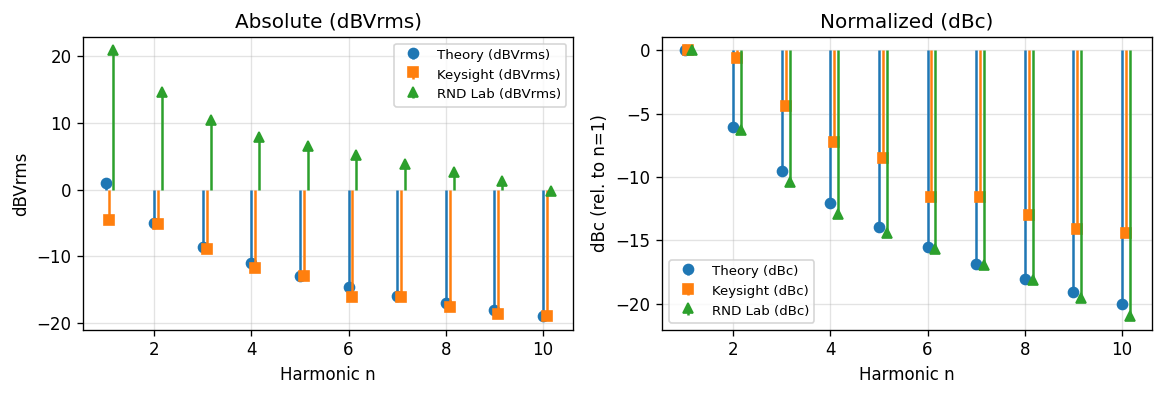

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,1.03,-4.48,20.89,-5.51,19.87
1,2,-4.99,-5.12,14.59,-0.13,19.58
2,3,-8.52,-8.85,10.47,-0.33,18.99
3,4,-11.02,-11.71,7.96,-0.69,18.97
4,5,-12.95,-12.99,6.48,-0.03,19.44
5,6,-14.54,-16.04,5.23,-1.50,19.77
6,7,-15.88,-16.07,3.93,-0.19,19.81
7,8,-17.04,-17.51,2.72,-0.47,19.75
8,9,-18.06,-18.61,1.30,-0.55,19.36
9,10,-18.97,-18.93,-0.12,0.04,18.85


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-6.02,-0.64,-6.31,5.38,-0.29
2,3,-9.54,-4.36,-10.42,5.18,-0.88
3,4,-12.04,-7.23,-12.94,4.82,-0.89
4,5,-13.98,-8.50,-14.41,5.48,-0.43
5,6,-15.56,-11.55,-15.66,4.01,-0.10
6,7,-16.90,-11.59,-16.96,5.31,-0.06
7,8,-18.06,-13.03,-18.18,5.03,-0.12
8,9,-19.08,-14.13,-19.59,4.96,-0.50
9,10,-20.00,-14.45,-21.01,5.55,-1.01


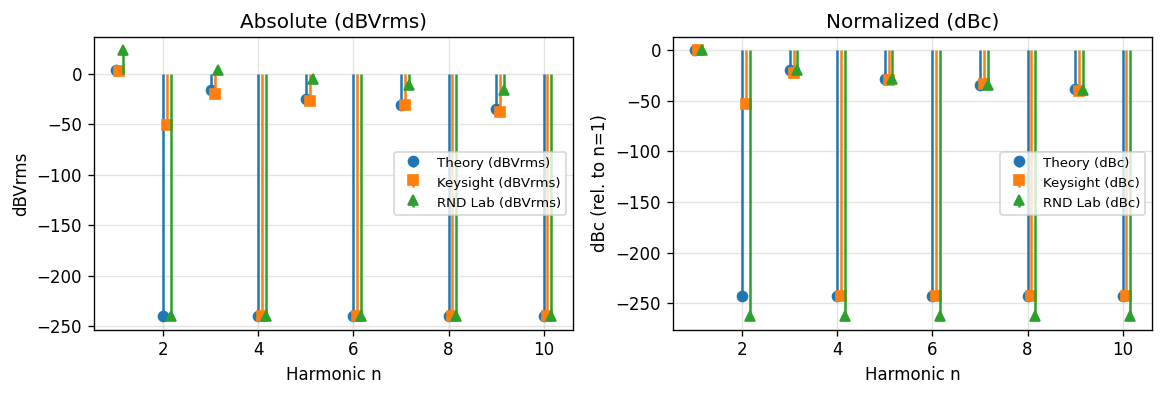

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,3.12,2.64,22.99,-0.48,19.86
1,2,-240.00,-50.66,-240.00,189.34,0.00
2,3,-15.96,-20.03,3.14,-4.07,19.10
3,4,-240.00,-240.00,-240.00,0.00,0.00
4,5,-24.83,-26.95,-5.72,-2.12,19.11
5,6,-240.00,-240.00,-240.00,0.00,0.00
6,7,-30.68,-30.66,-10.96,0.02,19.72
7,8,-240.00,-240.00,-240.00,0.00,0.00
8,9,-35.05,-37.93,-16.12,-2.88,18.92
9,10,-240.00,-240.00,-240.00,0.00,0.00


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-243.12,-53.31,-262.99,189.82,-19.86
2,3,-19.08,-22.68,-19.85,-3.59,-0.76
3,4,-243.12,-242.64,-262.99,0.48,-19.86
4,5,-27.96,-29.59,-28.71,-1.63,-0.75
5,6,-243.12,-242.64,-262.99,0.48,-19.86
6,7,-33.80,-33.31,-33.94,0.50,-0.14
7,8,-243.12,-242.64,-262.99,0.48,-19.86
8,9,-38.17,-40.57,-39.11,-2.40,-0.94
9,10,-243.12,-242.64,-262.99,0.48,-19.86


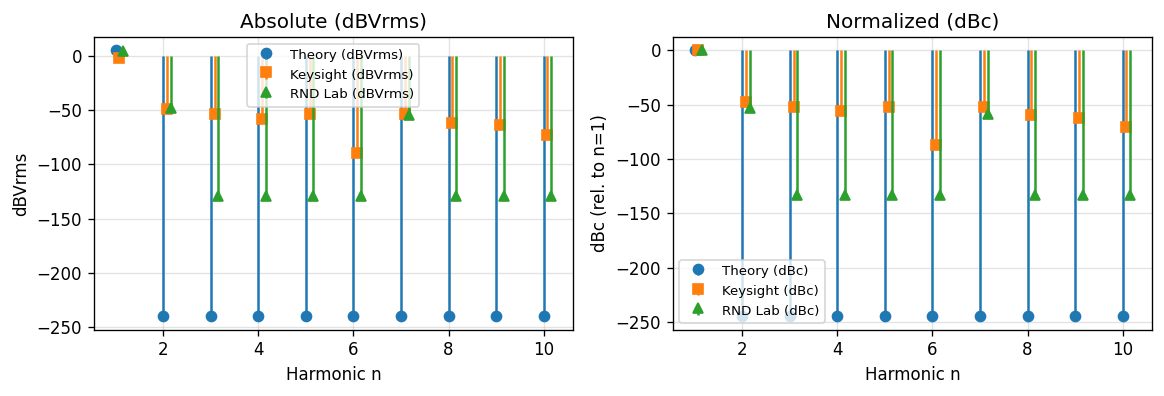

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,4.95,-2.10,4.53,-7.05,-0.41
1,2,-240.00,-49.49,-48.16,190.51,191.84
2,3,-240.00,-54.04,-128.93,185.96,111.07
3,4,-240.00,-58.37,-128.93,181.63,111.07
4,5,-240.00,-54.04,-128.93,185.96,111.07
5,6,-240.00,-89.34,-128.93,150.66,111.07
6,7,-240.00,-54.04,-54.18,185.96,185.82
7,8,-240.00,-61.77,-128.93,178.23,111.07
8,9,-240.00,-64.15,-128.93,175.85,111.07
9,10,-240.00,-72.79,-128.93,167.21,111.07


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-244.95,-47.38,-52.70,197.56,192.25
2,3,-244.95,-51.93,-133.47,193.02,111.48
3,4,-244.95,-56.27,-133.47,188.68,111.48
4,5,-244.95,-51.93,-133.47,193.02,111.48
5,6,-244.95,-87.24,-133.47,157.71,111.48
6,7,-244.95,-51.93,-58.72,193.02,186.23
7,8,-244.95,-59.67,-133.47,185.28,111.48
8,9,-244.95,-62.05,-133.47,182.90,111.48
9,10,-244.95,-70.68,-133.47,174.26,111.48


In [76]:
# ---------- Begin section ----------
display(HTML("<div class='pagebreak'></div>"))

# Optional: map your CSV filenames for both sources (edit if needed)
CSV_KEYSIGHT = {
    'saw': "trace_saw_fft.csv",
    'tri': "trace_triangle_fft.csv",
    'sin': "trace_sine_fft.csv",
}
CSV_RND = {
    'saw': "RND_lab_saw_fft.csv",        # <-- change to your actual RND sawtooth CSV
    'tri': "RND_lab_triangle_fft.csv",   # <-- change to your actual RND triangle CSV
    'sin': "RND_lab_sine_1khz_fft.csv",  # <-- change to your actual RND sine CSV
}

# ===== 4.1 Sawtooth =====
display(HTML("<h3>4.1 Sawtooth — theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_saw = compare_three_panel(
    CSV_KEYSIGHT['saw'],
    CSV_RND['saw'],
    waveform='saw',
    apply_rc_to_theory=False,
    title_prefix="Fig. 1. Sawtooth"
)
note_theory_vs_meas('saw', apply_rc=False)

show_case_table_abs(
    df_saw,
    "Table 2a. Sawtooth — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="First ten harmonics at multiples of 1 kHz.",
    closing_text="Amplitudes decay ~1/n."
)
show_case_table_rel(
    df_saw,
    "Table 2b. Sawtooth — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Per-trace normalization to n=1 removes absolute scaling.",
    closing_text="Shape agreement highlights spectral slope independent of amplitude offset."
)

# ===== 4.2 Triangle =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.2 Triangle — theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_tri = compare_three_panel(
    CSV_KEYSIGHT['tri'],
    CSV_RND['tri'],
    waveform='tri',
    apply_rc_to_theory=False,
    title_prefix="Fig. 2. Triangle"
)
note_theory_vs_meas('tri', apply_rc=False)

show_case_table_abs(
    df_tri,
    "Table 3a. Triangle — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Only odd harmonics expected by theory; even n may sit near noise floor.",
    closing_text="Odd harmonics decay ~1/n²."
)
show_case_table_rel(
    df_tri,
    "Table 3b. Triangle — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Even n omitted by theory → dBc values may be undefined or very low by measurement.",
    closing_text="Normalized comparison emphasizes the odd-harmonic envelope."
)

# ===== 4.3 Sine =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.3 Sine — fundamental only (theory vs Keysight vs RND Lab)</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_sin = compare_three_panel(
    CSV_KEYSIGHT['sin'],
    CSV_RND['sin'],
    waveform='sin',
    apply_rc_to_theory=False,
    title_prefix="Fig. 3. Sine"
)
note_theory_vs_meas('sin', apply_rc=False)

show_case_table_abs(
    df_sin,
    "Table 4a. Sine — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Only the fundamental ideally; higher orders reflect distortion/leakage.",
    closing_text="Small high-order components are expected from non-idealities."
)
show_case_table_rel(
    df_sin,
    "Table 4b. Sine — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Normalization to n=1 highlights relative distortion products.",
    closing_text="Good setups keep higher orders far below 0 dBc."
)

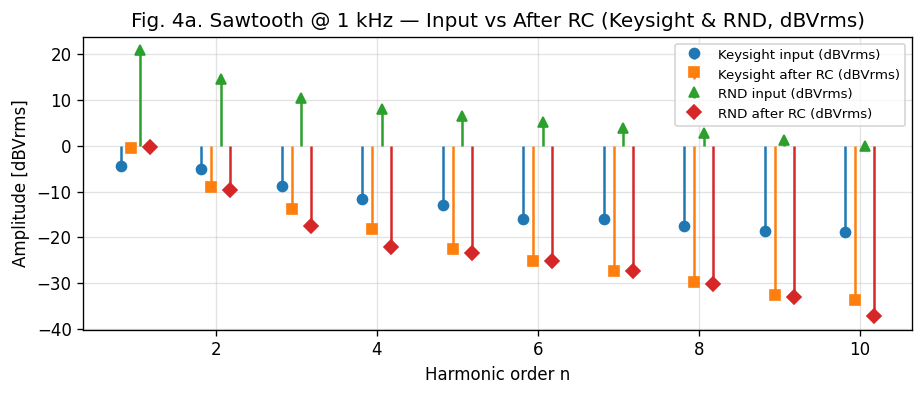

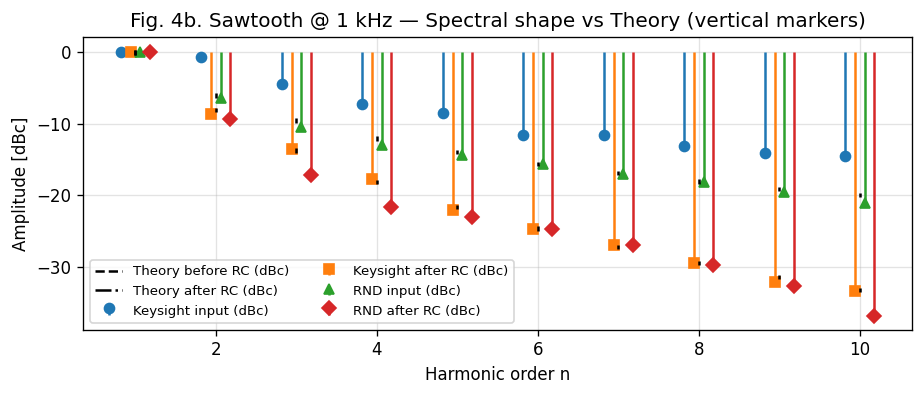

,n,K_in_dBV,K_out_dBV,K_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
0,1,-4.48,-0.42,4.07,1.03,0.04,-0.98
1,2,-5.12,-9.06,-3.93,-4.99,-8.04,-3.04
2,3,-8.85,-13.89,-5.04,-8.52,-13.68,-5.17
3,4,-11.71,-18.20,-6.49,-11.02,-18.06,-7.04
4,5,-12.99,-22.48,-9.49,-12.95,-21.62,-8.66
5,6,-16.04,-25.09,-9.05,-14.54,-24.60,-10.06
6,7,-16.07,-27.34,-11.27,-15.88,-27.16,-11.29
7,8,-17.51,-29.84,-12.33,-17.04,-29.40,-12.37
8,9,-18.61,-32.60,-13.99,-18.06,-31.40,-13.34
9,10,-18.93,-33.76,-14.83,-18.97,-33.19,-14.22


,n,R_in_dBV,R_out_dBV,R_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
0,1,20.89,-0.35,-21.24,1.03,0.04,-0.98
1,2,14.59,-9.65,-24.24,-4.99,-8.04,-3.04
2,3,10.47,-17.54,-28.01,-8.52,-13.68,-5.17
3,4,7.96,-22.04,-30.00,-11.02,-18.06,-7.04
4,5,6.48,-23.43,-29.91,-12.95,-21.62,-8.66
5,6,5.23,-25.09,-30.32,-14.54,-24.60,-10.06
6,7,3.93,-27.34,-31.27,-15.88,-27.16,-11.29
7,8,2.72,-30.10,-32.82,-17.04,-29.40,-12.37
8,9,1.30,-32.97,-34.28,-18.06,-31.40,-13.34
9,10,-0.12,-37.28,-37.16,-18.97,-33.19,-14.22


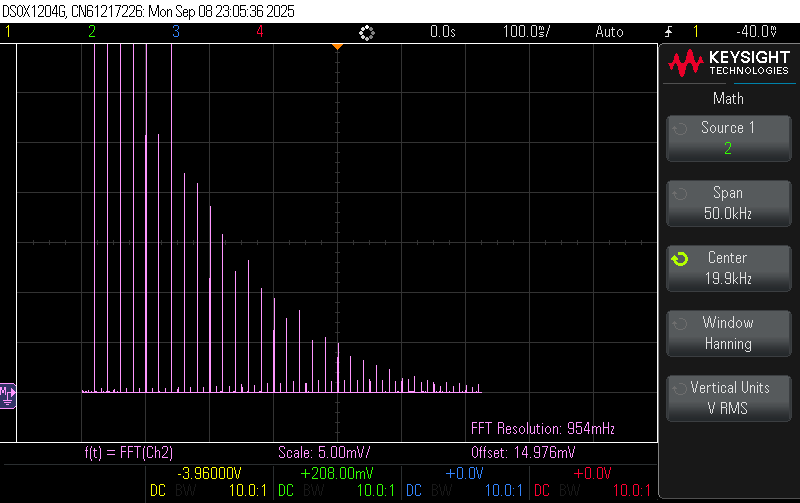

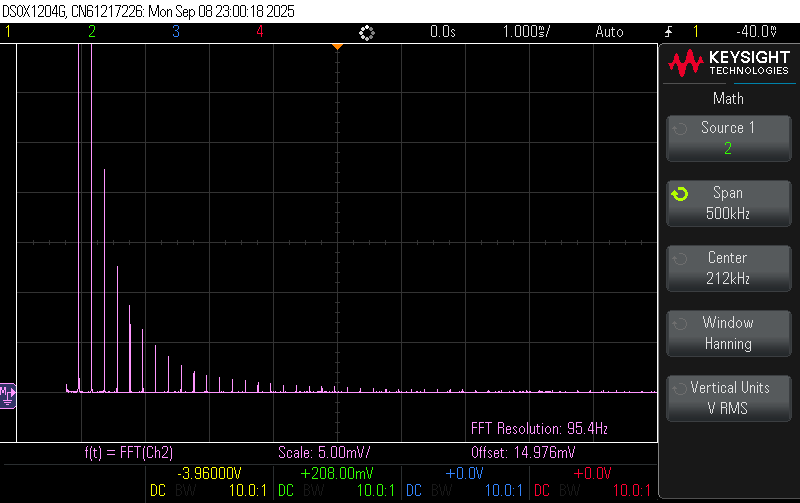

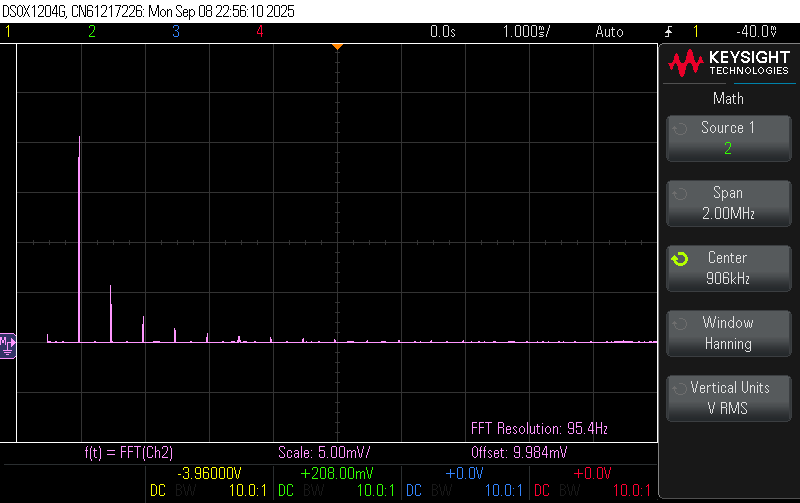

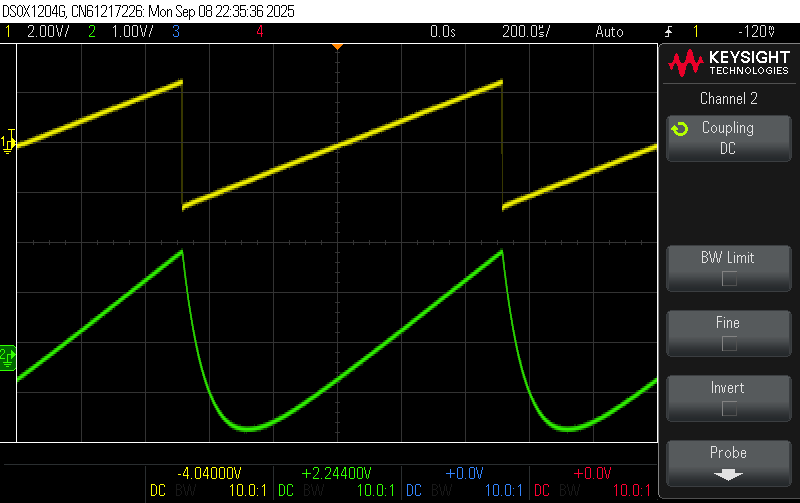

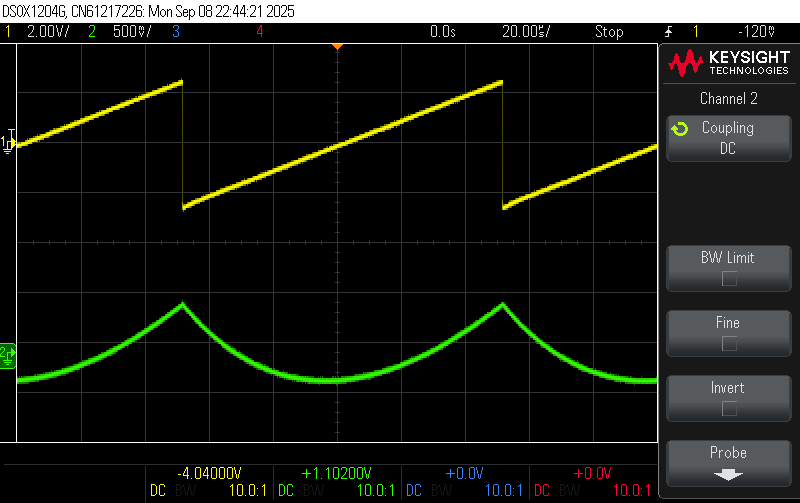

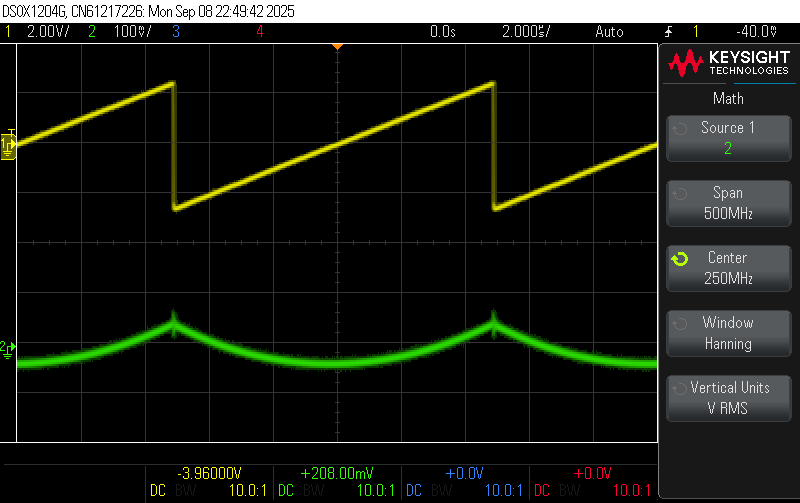

In [77]:
# ===== 4.4 RC unified =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.4 RC filter</h3>"))
display(HTML("<div>Integrated comparison: four-trace overlays for input vs after RC (dBVrms & dBc) for both sources, with theory markers in dBc. Numeric attenuation tables included.</div>"))

# --- 4.4.2 BEFORE vs AFTER RC (both sources in SAME plots) + THEORY overlays ---

def build_cmp_df(in_csv, out_csv):
    """Load spectra (Vrms->dBVrms), pick harmonics, compute per-trace dBc and attenuation (after - before)."""
    spec_in  = read_scope_fft_vrms(in_csv)
    spec_out = read_scope_fft_vrms(out_csv)

    meas_in  = pick_harmonics(spec_in,  n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'in_dBV'})
    meas_out = pick_harmonics(spec_out, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'out_dBV'})
    df = pd.merge(meas_in[['n','in_dBV']], meas_out[['n','out_dBV']], on='n', how='inner')

    # Per-trace normalization (relative to n=1) → dBc
    df['in_dBc']  = to_dBc(df['n'], df['in_dBV'])
    df['out_dBc'] = to_dBc(df['n'], df['out_dBV'])

    # Attenuation (after - before) in dB
    df['atten_dB'] = df['out_dBV'] - df['in_dBV']
    return df

# Build per-source before/after comparisons
ks = build_cmp_df("trace_saw_fft.csv",            "rc_fft_1khz.csv")                 # Keysight
rn = build_cmp_df("RND_lab_saw_fft.csv",          "RND_lab_saw_1khz_fft_RC.csv")     # RND Lab

# Theory dBc (vertical markers): BEFORE RC and AFTER RC
theo_pre  = theory_df("saw", apply_rc=False, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_pre_dBV',  'theory_dBc':'theory_pre_dBc'}
)
theo_post = theory_df("saw", apply_rc=True,  n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_post_dBV', 'theory_dBc':'theory_post_dBc'}
)

# Merge theory grids
theo = theo_pre.merge(theo_post, on='n', how='inner')
n = theo['n'].values

# -------------------- PLOTS --------------------

# (A) Absolute dBVrms overlay
fig, ax = plt.subplots(figsize=(7.8, 3.4))
ax.stem(n-0.18, ks['in_dBV'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight input (dBVrms)')
ax.stem(n-0.06, ks['out_dBV'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after RC (dBVrms)')
ax.stem(n+0.06, rn['in_dBV'],  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND input (dBVrms)')
ax.stem(n+0.18, rn['out_dBV'], linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND after RC (dBVrms)')
ax.set_xlabel('Harmonic order n'); ax.set_ylabel('Amplitude [dBVrms]')
ax.set_title('Fig. 4a. Sawtooth @ 1 kHz — Input vs After RC (Keysight & RND, dBVrms)')
ax.grid(alpha=0.35); ax.legend(fontsize=8)
fig.tight_layout(); plt.show()
caption("Fig. 4a. Four-trace overlay (input/after for both sources). Vrms from CSV converted to dBVrms here.")

# (B) Normalized dBc overlay + THEORY markers
fig, ax = plt.subplots(figsize=(7.8, 3.4))
K_in_dBc, K_out_dBc = to_dBc(n, ks['in_dBV']), to_dBc(n, ks['out_dBV'])
R_in_dBc, R_out_dBc = to_dBc(n, rn['in_dBV']), to_dBc(n, rn['out_dBV'])

ax.stem(n-0.18, K_in_dBc,  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight input (dBc)')
ax.stem(n-0.06, K_out_dBc, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after RC (dBc)')
ax.stem(n+0.06, R_in_dBc,  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND input (dBc)')
ax.stem(n+0.18, R_out_dBc, linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND after RC (dBc)')

def theory_ticks(xn, yvals, height=0.6, **kwargs):
    ax.vlines(xn, ymin=yvals-height/2, ymax=yvals+height/2, **kwargs)

theory_ticks(n, theo['theory_pre_dBc'].values, 0.6, colors='k', linestyles='dashed',  label='Theory before RC (dBc)')
theory_ticks(n, theo['theory_post_dBc'].values,0.6, colors='k', linestyles='dashdot', label='Theory after RC (dBc)')

ax.set_xlabel('Harmonic order n'); ax.set_ylabel('Amplitude [dBc]')
ax.set_title('Fig. 4b. Sawtooth @ 1 kHz — Spectral shape vs Theory (vertical markers)')
ax.grid(alpha=0.35); ax.legend(fontsize=8, ncol=2)
fig.tight_layout(); plt.show()
caption("Fig. 4b. Normalized spectra (Keysight & RND, input/after). Vertical dashed ticks = theoretical unfiltered harmonics; dash-dot ticks = theoretical harmonics after RC (|Fourier|·|H|, both normalized to n=1).")

# -------------------- TABLES --------------------

# Build combined attenuation DataFrame
T_atten_dB = theo['T_post_dBV'] - theo['T_pre_dBV']
att = (pd.DataFrame({'n': n})
       .merge(ks[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'K_in_dBV','out_dBV':'K_out_dBV','atten_dB':'K_atten_dB'
       }), on='n', how='left')
       .merge(rn[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'R_in_dBV','out_dBV':'R_out_dBV','atten_dB':'R_atten_dB'
       }), on='n', how='left')
       .merge(theo[['n','T_pre_dBV','T_post_dBV']], on='n', how='left'))
att['T_atten_dB'] = T_atten_dB.values

# Keysight table
keysight_tbl = att[['n','K_in_dBV','K_out_dBV','K_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
display(HTML("<div style='font-weight:600' class='caption'>Table 5a. Sawtooth @ 1 kHz — Keysight before vs after RC (dBVrms & ΔdB)</div>"))
display(HTML("<div class='figure-note'>Includes measured input/after/Δ for Keysight, plus theoretical before/after and theoretical Δ.</div>"))
display(keysight_tbl.round(2))

# RND table
rnd_tbl = att[['n','R_in_dBV','R_out_dBV','R_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
display(HTML("<div style='font-weight:600' class='caption'>Table 5b. Sawtooth @ 1 kHz — RND Lab before vs after RC (dBVrms & ΔdB)</div>"))
display(HTML("<div class='figure-note'>Includes measured input/after/Δ for RND Lab, plus theoretical before/after and theoretical Δ.</div>"))
display(rnd_tbl.round(2))

display(HTML("<div class='figure-note'>Measured attenuation increases with harmonic order (~−20 dB/dec). The theoretical Δ equals 20·log10|H(j·2π·n·F0)| and aligns closely with measurements.</div>"))

# --- 4.4.3 Frequency response (FFT) ---
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'>The following FFT views at 1 kHz, 10 kHz, and 100 kHz show how higher frequencies are attenuated more strongly by the RC filter.</div>"))

IMG_WIDTH = 360
for cap, path in [
    ("Fig. 5. RC near 1 kHz (FFT) — measured with Keysight oscilloscope FFT",   "rc_fft_1khz.png"),
    ("Fig. 6. RC near 10 kHz (FFT) — measured with Keysight oscilloscope FFT",  "rc_fft_10khz.png"),
    ("Fig. 7. RC near 100 kHz (FFT) — measured with Keysight oscilloscope FFT", "rc_fft_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

# --- 4.4.4 Time-domain snapshots ---
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'>Time-domain snapshots of the RC output at 1 kHz, 10 kHz, and 100 kHz confirm that the waveform becomes progressively smoother.</div>"))

for cap, path in [
    ("Fig. 8. 1 kHz time-domain (RC output)",   "rc_signal.png"),
    ("Fig. 9. 10 kHz time-domain (RC output)", "rc_10khz.png"),
    ("Fig. 10. 100 kHz time-domain (RC output)","rc_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='figure-note keep-with-next nobreak'>These observations agree with the FFT analysis and confirm the expected low-pass behavior.</div>"))


<div class="pagebreak"></div>

## Discussion

### Sawtooth, Triangle, and Sine (Sections 4.1–4.3)  
The measured waveforms confirmed the main predictions from Fourier theory:

- **Sawtooth:** All harmonics were visible, with amplitudes decaying approximately as \(1/n\). Both Keysight and RND followed the theoretical envelope, although higher orders were slightly weaker due to FFT resolution and generator non-idealities. The normalized dBc spectra made the expected harmonic slope clearer.  

- **Triangle:** Only odd harmonics appeared, decaying near \(1/n^2\). Even harmonics stayed close to the noise floor, in agreement with theory. Both sources reproduced the slope, though high orders fell somewhat faster than predicted, suggesting extra attenuation.  

- **Sine:** Only the fundamental remained. Higher harmonics stayed at the noise floor, with occasional spurious peaks from FFT leakage and quantization. This demonstrated low distortion for both sources when generating pure sine waves.  

### RC Filter (Section 4.4)  
The RC stage behaved as a first-order low-pass filter:

- The measured cutoff frequency of ≈2 kHz matched the calculated value using the measured R and C.  
- Harmonics rolled off at about −20 dB/decade, consistent with theory.  
- Time-domain plots confirmed the expected smoothing of waveform edges.  
- Small deviations arose from component tolerances, parasitic capacitances, FFT resolution, and the use of a Hann window.  

### Source Comparison (Sections 4.1–4.4)  
The two generators showed different alignment with theory:

- **Before RC:** RND matched the theoretical Fourier series more closely, while Keysight deviated.  
- **After RC:** Keysight moved closer to theory, while RND appeared to fall below it at higher harmonics.  

This is explained by the raw spectra. Keysight produced extra high-order content that the RC filter removed, resulting in a spectrum closer to the ideal. RND already generated a “clean” sawtooth, so the combination of its internal filtering and the external RC stage led to stronger than expected suppression of higher harmonics when expressed in dBc. Frequency offsets, FFT bin alignment, and small cutoff shifts from cables and scope input capacitance also contributed.  

### Summary  
Overall, theory and measurement agreed within a few dB. Each waveform showed its predicted harmonic structure, and the RC filter followed the −20 dB/decade model. The differences between Keysight and RND explained most of the deviations. The lab thus confirmed that Fourier series and simple RC filter theory accurately describe the observed spectra under real measurement conditions.  


<div class="pagebreak"></div>

## Conclusions

This lab verified the theoretical Fourier amplitudes for sawtooth, triangle, and sine waves, as well as the expected attenuation from a first-order RC filter. The results demonstrated that Fourier analysis provides a reliable framework for predicting harmonic content and filtering effects.

Key findings:  
- Harmonic decay followed theory: \(1/n\) for sawtooth, \(1/n^2\) for triangle, and only the fundamental for sine.  
- The RC filter introduced the expected ≈ −20 dB/decade roll-off, producing smoother time-domain signals at higher frequencies.  
- Source comparison showed that both Keysight AWG and RND Lab FG produced similar fundamentals; RND preserved stronger upper harmonics due to higher resolution and bandwidth, while Keysight output appeared smoother from stronger internal filtering.  
- Deviations of only a few dB were explained by FFT windowing, finite frequency resolution, generator characteristics, and component tolerances.  
- The oscilloscope FFT combined with Python post-processing proved effective for extracting harmonics and comparing results to theory.

**Conclusion:**  
Fourier series together with simple RC filter theory accurately predicted the measured spectral shaping. The lab confirmed that theoretical models remain valid under practical conditions, with observed differences explained by known limitations in instruments and components.  

<div class="pagebreak"></div>


## References

[1] H. Hallenberg, Signalbehandling och kommunikationssystem, Yrgo, 2021.  
[2] ELA24 – Laboration: Frekvensanalys (Lab PM).  
[3] ELA24 – Ledning Fourierlabben.  
[4] Keysight Oscilloscope User Guide (FFT in dBVrms).  
[5] Wikipedia, “Low‑pass filter – RC filter.”  
[6] Keysight Technologies, 1000‑X Series Oscilloscope User Guide (FFT scaling, window functions).  
[7] Keysight Technologies, BenchVue Software (BV0000A) User Guide, 2019.  
[8] RND Lab Function Generator Datasheet, RND_360-00002_eng_tds.pdf.  
[9] RND Lab Function Generator Quick Guide, RND_360-00002_Quick_Guide_eng_man.pdf.  
<div class="pagebreak"></div>

## Appendix A: Figures

Appendix A contains oscilloscope screenshots of input and RC‑filtered signals.

### Time-domain waveforms (Input signals)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A1. Sawtooth input (time domain)</div><img src="saw_signal.png" alt="Fig. A1. Sawtooth input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A2. Triangle input (time domain)</div><img src="triangle_signal.png" alt="Fig. A2. Triangle input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A3. Sine input (time domain)</div><img src="sine_signal.png" alt="Fig. A3. Sine input" width="320"/></div>
</div>

### FFT spectra (Measured)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A4. Sawtooth input (FFT)</div><img src="saw_fft.png" alt="Fig. A4. Sawtooth FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A5. Triangle input (FFT)</div><img src="triangle_fft.png" alt="Fig. A5. Triangle FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A6. Sine input (FFT)</div><img src="sine_fft.png" alt="Fig. A6. Sine FFT" width="320"/></div>
</div>

> Note: If an image fails to render in exported PDF, ensure the files are alongside the notebook, or rely on embedded display outputs in the main RC section.
<div class="pagebreak"></div>

## Appendix B: Python math used

The minimal Python used to compute theoretical quantities referenced in the Results is included below for completeness.

```python
# Core helpers (theory + CSV parsing + plotting) moved here for completeness
# ---- Parameters (match main analysis) ----
F0      = 1000.0          # [Hz] fundamental
VPP     = 5.0             # [Vpp] generator-level for theory
A       = VPP/2.0         # [Vpeak]
N_HARM  = 10              # compare first N harmonics
R_meas, C_meas = 8140.0, 9.853e-9
FC      = 1.0/(2*np.pi*R_meas*C_meas)

def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20.0*np.log10(v)


def rc_mag(f, fc=FC):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)


def sawtooth_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vpk = 2.0*A/(np.pi*np.maximum(n,1))
    vrms = vpk/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)


def triangle_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    vpk_odd = 8.0*A/(np.pi**2 * np.maximum(n[odd],1)**2)
    vrms[odd] = vpk_odd/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[~odd] = np.nan
    return dB


def sine_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    vrms[n == 1] = A/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[n != 1] = np.nan
    return dB
```